<!-- <center>
<h2>
MALLORN Astronomical Classification
</h2>
</center>

<center>
<h2></h2>
<h3></h3>
<h3></h3>
<h3>
Rasmus Eliasson & Oskar Flodin
</h3>
<img src="bth.png" width="100">

<h5>
    M.Sc. Eng. in AI & Machine Learning <br>
    DIDA, Blekinge Institute of Technology<br>
    Karlskrona, Sweden
</h5>

<mail>rael23@student.bth.se <br>
osfl22@student.bth.se</mail>

<p>2025-12-12</p>
</center>
 -->

 <h2 style="text-align:center;">MALLORN Astronomical Classification</h2>

<h3 style="text-align:center;">Rasmus Eliasson & Oskar Flodin</h3>

<div style="text-align:center;">
    <img src="bth.png" width="100">
    <h5 style="margin:4px 0; line-height:1.2;">
        M.Sc. Eng. in AI & Machine Learning<br>
        DIDA, Blekinge Institute of Technology
    </h5>
    <h5 style="margin:4px 0;">Karlskrona, Sweden</h5>
    <a href="mailto:rael23@student.bth.se">rael23@student.bth.se</a><br>
    <a href="mailto:osfl22@student.bth.se">osfl22@student.bth.se</a>
    <p style="text-align:center;">
</div>



<center>
<h2>
    Traditional Machine Learning Approach - Pre processing
</h2>
</center>


In [39]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import Dropdown, VBox, interactive_output
import extract_data as ed


main_folder = "mallorn-astronomical-classification-challenge"
data_folder = "Data"
data_path = os.path.join(os.getcwd(), data_folder)
re_extract_data = False

path = os.path.join(os.getcwd(), main_folder)


# data_paths_list = [os.path.join(main_folder, d) for d in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, d))]


base_path = os.path.join(os.getcwd(), "mallorn-astronomical-classification-challenge")

split_paths = [
    os.path.join(base_path, d)
    for d in os.listdir(base_path)
    if d.startswith("split_") and os.path.isdir(os.path.join(base_path, d))
]

split_map = {
    os.path.basename(p): p
    for p in split_paths
}

all_splits = {}

for split_name, split_path in split_map.items():
    all_splits[split_name] = {
        "train": pd.read_csv(os.path.join(split_path, "train_full_lightcurves.csv")),
        "test": pd.read_csv(os.path.join(split_path, "test_full_lightcurves.csv")),
    }



In [40]:
from observe_star_band import plot_lightcurve

df = pd.concat(
    [split_data["train"] for split_data in all_splits.values()],
    ignore_index=True
)

path = os.path.join(os.getcwd(), main_folder)
log_df = pd.read_csv(os.path.join(path, "train_log.csv"))


object_ids = sorted(df["object_id"].unique())


widgets.interact(
    plot_lightcurve,
    object_ID=widgets.Dropdown(options=object_ids),
    df=widgets.fixed(df),
    log_df=widgets.fixed(log_df)
);

interactive(children=(Dropdown(description='object_ID', options=('Dornhoth_anwar_melethron', 'Dornhoth_archam_…

In [41]:

def Null_check_func(split_name):
    # split_path = split_map[split_name]

    split_train = all_splits[split_name]["train"]
    split_test  = all_splits[split_name]["test"]

    fig, axes = plt.subplots(1, 2, figsize=(14, 8))

    sns.heatmap(
        split_train.isnull(),
        cbar=False,
        yticklabels=False,
        cmap="viridis",
        ax=axes[0]
    )
    axes[0].set_title(f"Check for train NULLs in {split_name}")

    sns.heatmap(
        split_test.isnull(),
        cbar=False,
        yticklabels=False,
        cmap="viridis",
        ax=axes[1]
    )
    axes[1].set_title(f"Check for test NULLs in {split_name}")

    plt.show();


widgets.interact(
    Null_check_func,
    split_name=widgets.Dropdown(options=sorted(split_map.keys()))
);


interactive(children=(Dropdown(description='split_name', options=('split_01', 'split_02', 'split_03', 'split_0…

In [42]:

if re_extract_data:
    df_train, df_test = ed.merge_and_save_data()
else:
    df_train = pd.read_csv(os.path.join(data_path, "MALLORN-data_train.csv"), sep=',')
    df_test = pd.read_csv(os.path.join(data_path, "MALLORN-data_test.csv"), sep=',')


Due to the sparsity and short duration of the available light curves, feature engineering was performed by aggregating per-filter statistical and temporal descriptors. While this approach increases dimensionality and introduces correlated features, it enables classical machine learning models to capture coarse variability patterns. Dimensionality reduction techniques such as PCA and t-SNE did not reveal clear class separation, reflecting the heterogeneous nature of the engineered feature space rather than a failure of the feature extraction process. 

In [43]:
exclude_cols = [
    "English Translation",
    "object_id",
    "split",
    "SpecType",
    "target"
]
common_cols = sorted(
    set(df_train.columns).intersection(df_test.columns) - set(exclude_cols)
)

df_train = df_train.dropna(axis=1, how="all")
df_test  = df_test.dropna(axis=1, how="all")

def attribute_func(Attribute):
    fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)

    if Attribute in df_train.columns:
        sns.boxplot(data=df_train[[Attribute]], ax=axes[0], color="darkred")
    axes[0].set_title(f"Dataset Train: {Attribute}")
    axes[0].set_xlabel("")

    if (Attribute in df_test.columns and Attribute not in exclude_cols):
        sns.boxplot(data=df_test[[Attribute]], ax=axes[1], color="darkred")
    axes[1].set_title(f"Dataset Test: {Attribute}")
    axes[1].set_xlabel("")

    plt.tight_layout()
    plt.show()

widgets.interact(attribute_func, Attribute=common_cols);

interactive(children=(Dropdown(description='Attribute', options=('EBV', 'Z', 'Z_err', 'flux_peak_g', 'flux_pea…

In [44]:
df_map = {
    "train": df_train,
    "test": df_test
}

# Helper: create column intervals.
def make_intervals(df, group_size=6):
    intervals = []
    n_cols = len(df.columns)

    for i in range(0, n_cols, group_size):
        start = i + 1
        end = min(i + group_size, n_cols)
        intervals.append(f"{start}-{end}")

    return intervals


def get_intervals(dataset):
    return make_intervals(df_map[dataset], group_size=6)

# Plot function (controlled by widgets)
def histo_plot(dataset, interval):
    df = df_map[dataset]

    start, end = map(int, interval.split("-"))
    cols = df.columns[start - 1:end]

    df[cols].hist(bins="auto", figsize=(12, 8))
    plt.suptitle(
        f"{dataset.upper()} histograms — columns {interval}",
        fontsize=18
    )
    plt.tight_layout()
    plt.show()

dataset_widget = Dropdown(
    options=["train", "test"],
    value="train",
    description="Dataset:"
)

interval_widget = Dropdown(
    description="Interval:"
)

# Update interval options when dataset changes
def update_intervals(change):
    interval_widget.options = get_intervals(change["new"])
    interval_widget.value = interval_widget.options[0]

dataset_widget.observe(update_intervals, names="value")
update_intervals({"new": dataset_widget.value})  # initialize

# --------------------------------------------------
# Layout & display
# --------------------------------------------------
ui = VBox([dataset_widget, interval_widget])

out = interactive_output(
    histo_plot,
    {
        "dataset": dataset_widget,
        "interval": interval_widget
    }
)

display(ui, out)


Output()

In [45]:
features = df_train.copy()

# 1. Create amplitude features (per filter)
bands = ["u", "g", "r", "i", "z", "y"]

for band in bands:
    max_col = f"max_flux_{band}"
    min_col = f"min_flux_{band}"
    if max_col in features.columns and min_col in features.columns:
        features[f"amplitude_{band}"] = features[max_col] - features[min_col]


# 2. Get numeric feature list (exclude target)
numeric_features = (
    features
    .select_dtypes(include="number")
    .columns
    .drop("target", errors="ignore")
)

# 3. Plot function (distribution + reference scatter)
def feature_distribution_vs_class(feature, reference):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    display_name = feature.replace("_", " ").title()
    reference_name = reference.replace("_", " ").title()

    # ---- Left: distribution by class ----
    sns.histplot(
        data=features,
        x=feature,
        hue="target",
        bins="auto",
        element="step",
        kde=False,
        ax=axes[0]
    )

    axes[0].set_title(f"Distribution of {display_name} by Class")
    axes[0].set_xlabel(display_name)
    axes[0].set_ylabel("Count")

    # ---- Right: feature vs reference ----
    sns.scatterplot(
        data=features,
        x=feature,
        y=reference,
        hue="target",
        alpha=0.6,
        ax=axes[1]
    )

    axes[1].set_title(f"{display_name} vs {reference_name}")
    axes[1].set_xlabel(display_name)
    axes[1].set_ylabel(reference_name)

    fig.tight_layout()
    plt.show()


# 4. Interactive widgets
widgets.interact(
    feature_distribution_vs_class,
    feature=widgets.Dropdown(
        options=numeric_features,
        description="Feature:"
    ),
    reference=widgets.Dropdown(
        options=numeric_features,
        description="Reference:"
    )
);


interactive(children=(Dropdown(description='Feature:', options=('n_obs_u', 'mean_flux_u', 'std_flux_u', 'max_f…

In [46]:
# Only numeric columns
df_num = df_train.select_dtypes(include=[np.number]).copy()

# Checks if target is boolean in teh dataframe, make it numeric
if "target" in df_train.columns and "target" not in df_num.columns:
    df_num["target"] = pd.to_numeric(df_train["target"], errors="coerce")
# Correlation on numeric values
corr_matrix = df_num.corr(numeric_only=True)
attributes = corr_matrix.columns.tolist()

def correlation_graph(attribute = 'target'):
    corr_with_attribute = corr_matrix[attribute].sort_values(ascending=False)

    # Exclude the 'attribute' itself.
    features = corr_with_attribute.index[corr_with_attribute.index != attribute]

    plot_df = pd.DataFrame({
        "feature": features,
        "correlation": corr_with_attribute[features].values
    })

    # Makes some nice scale for the plot.
    min_corr = round(plot_df['correlation'].min(), 1)
    max_corr = round(plot_df['correlation'].max(), 1)
    margin = 0.05

    plt.figure(figsize=(12,6))
    sns.barplot(x="feature", y="correlation", data=plot_df, hue="correlation", dodge=False, palette="coolwarm")
    plt.xticks(rotation=90)
    plt.ylim(min_corr - margin, max_corr + margin)
    plt.title(f"Correlation of features with {attribute}")
    plt.ylabel(f"Correlation with {attribute}")
    # remove legend, since it does not contribute.
    plt.legend([],[], frameon=False)
    plt.show()

widgets.interact(correlation_graph, attribute = attributes);

interactive(children=(Dropdown(description='attribute', index=62, options=('n_obs_u', 'mean_flux_u', 'std_flux…

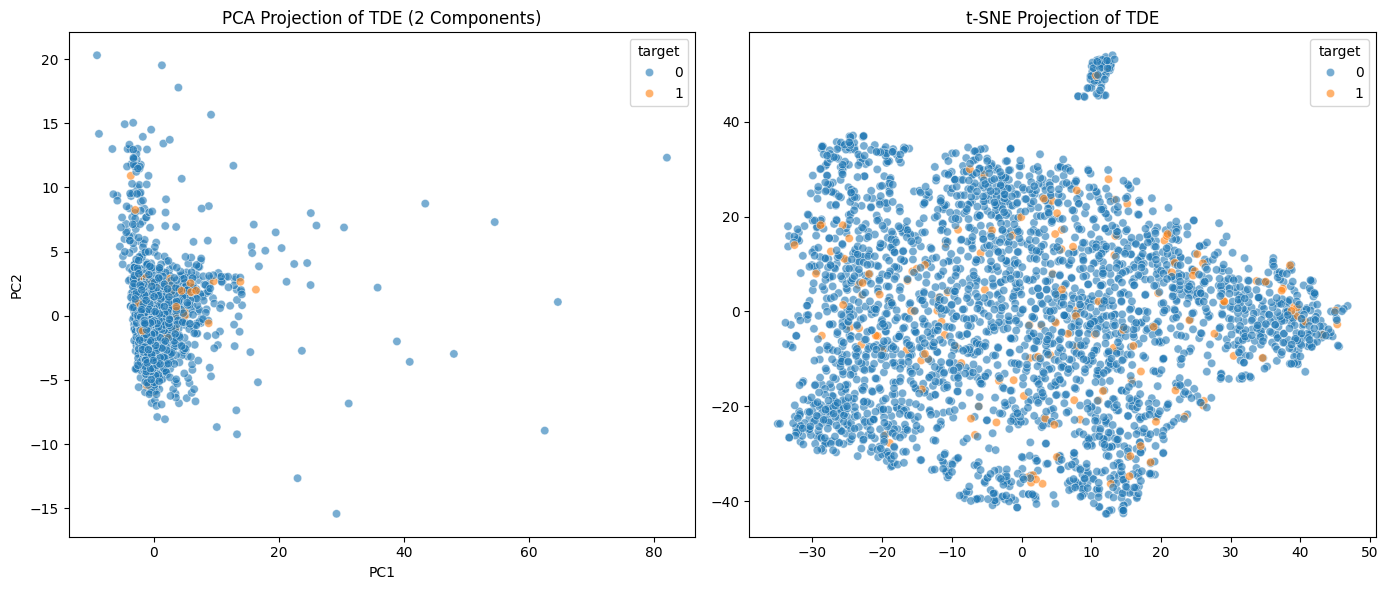

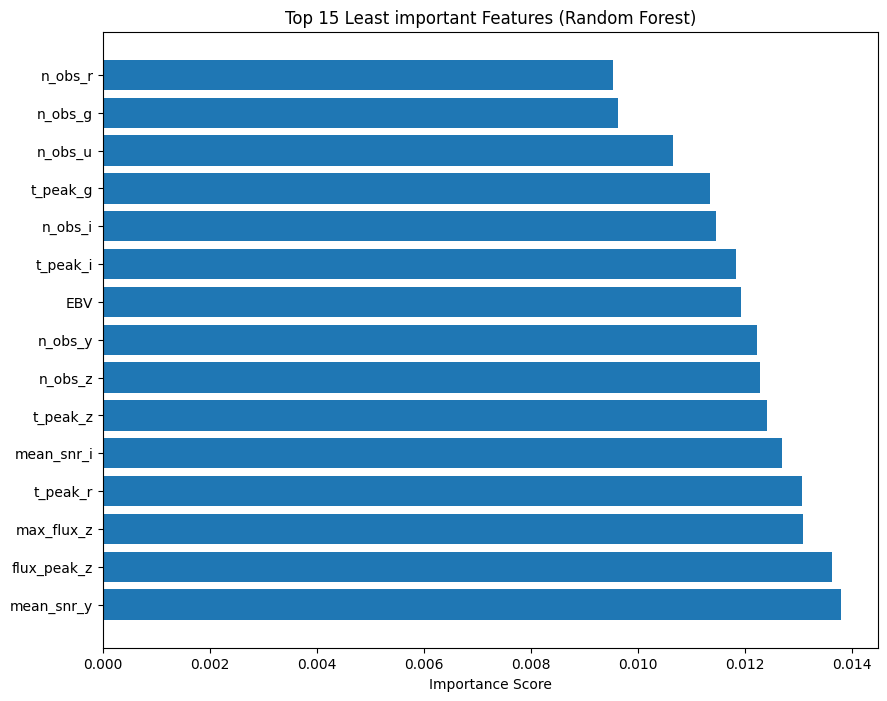

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier


#####################################
#               PCA                 #
#####################################
fig, subfigs = plt.subplots(1, 2, figsize=(14, 6))

df_num.dropna(inplace=True)

X = df_num.drop(columns=exclude_cols, errors="ignore")


# 3. Keep only numeric columns (VERY important for PCA / t-SNE)
X = X.select_dtypes(include="number")
y = df_num['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# PCA computes orthogonal linear combinations of the original features.
# PC1 captures the maximum variance direction; PC2 captures the next,
# orthogonal direction. Class labels are not used.
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

sns.scatterplot(x=components[:,0], y=components[:,1], hue=y, alpha=0.6, ax=subfigs[0])
subfigs[0].set_title("PCA Projection of TDE (2 Components)")
subfigs[0].set_xlabel("PC1")
subfigs[0].set_ylabel("PC2")


#####################################
#              t_SNE                #
#####################################
# t-SNE is a non-linear, unsupervised embedding that preserves local
# neighborhood relationships. It is primarily used for visualization
# and does not preserve global distances or class boundaries.
tsne = TSNE(n_components=2, random_state=42, perplexity=40)
tsne_results = tsne.fit_transform(X_scaled)

sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], hue=y, alpha=0.6, ax=subfigs[1])
subfigs[1].set_title("t-SNE Projection of TDE")
fig.tight_layout()
plt.show()


#####################################
#       Feature importance          #
#####################################
drop_cols = [
    "English Translation",
    "object_id",
    "split",
    "target"
]

X = df_num.drop(columns=drop_cols, errors="ignore")
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
# ascending order.
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title("Top 15 Least important Features (Random Forest)")
plt.barh([X.columns[i] for i in indices[:15]], importances[indices[:15]])
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()



<center>
<h2>Dimensionality Reduction Analysis of TDE Feature Space</h2>
</center>

<h3>Overview</h3>
<p>
The figure above presents two low-dimensional projections of the TDE dataset:
a <b>PCA projection (2 components)</b> and a <b>t-SNE projection</b>, with points
colored by the binary target label (TDE vs. non-TDE).
These projections are used to assess the intrinsic structure of the feature
space and the separability of the target classes.
</p>

<h3>PCA Projection</h3>
<p>
The PCA projection shows that the data is highly concentrated along the first
principal component, with substantial variance spread across a wide range of
values. Despite this variance, there is <b>no clear linear separation</b> between
TDE and non-TDE events. The minority TDE class appears sparsely distributed and
largely embedded within the dominant non-TDE population.
</p>

<p>
This suggests that the directions of maximum variance captured by PCA are not
aligned with the decision boundary required to separate the classes, indicating
that a simple linear model operating in the original feature space may struggle
to discriminate between TDE and non-TDE events.
</p>

<h3>t-SNE Projection</h3>
<p>
The t-SNE visualization further highlights the complexity of the data structure.
While local clustering patterns are visible, the TDE events do not form a
distinct or isolated cluster. Instead, they are scattered throughout the
manifold occupied by the majority class.
</p>

<p>
Because t-SNE emphasizes local neighborhood structure, the lack of a cohesive
TDE cluster suggests that TDE events are not characterized by a single, compact
region of feature space, but rather overlap significantly with non-TDE events
across multiple local neighborhoods.
</p>

<h3>Implications for Model Choice</h3>
<p>
The strong overlap observed in both PCA and t-SNE projections implies that
<b>logistic regression is likely to be a poor baseline model</b> for this task.
As a linear classifier, logistic regression assumes a roughly linear decision
boundary, which is inconsistent with the complex, overlapping structure observed
in the projections.
</p>

<p>
More expressive, non-linear models such as <b>tree-based ensembles</b> (e.g.,
Random Forests, Gradient Boosting) or <b>kernel-based methods</b> are better suited
to capture the interactions and higher-order decision boundaries implied by the
data.
</p>

<h3>Class Imbalance Considerations</h3>
<p>
Another critical factor is the apparent <b>class imbalance</b>. TDE events
represent a small fraction of the dataset, which further degrades the performance
of linear classifiers trained with standard loss functions.
</p>

<p>
To mitigate this, rebalancing strategies should be explored, including:
</p>
<ul>
  <li>Oversampling techniques such as <b>SMOTE</b> or its variants</li>
  <li>Class-weighted loss functions</li>
  <li>Anomaly-detection or rare-event classification frameworks</li>
</ul>

<p>
However, even with oversampling, the heavy overlap in feature space suggests that
performance gains from linear models may remain limited.
</p>

<h3>Conclusion</h3>
<p>
Overall, the dimensionality reduction analysis indicates that TDE classification
is a <b>non-linearly separable, imbalanced learning problem</b>. Logistic
regression is therefore unlikely to provide strong performance without extensive
feature engineering. The results motivate the use of non-linear models combined
with imbalance-aware training strategies to better capture the underlying
structure of the data.
</p>



<hr>
<hr>
<center>
  <h2>
    Model Implementation
  </h2>
</center>





In [48]:
# Model imports.
from custom_wrapped_NN import create_nn_classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Stacked ensemble class.
from StackingEnsemble import StackingEnsemble

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate

random_state = 42
# Split data for training and final validation.
X_train, x_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state= random_state)


n_negative = (y_train == 0).sum()
n_positive = (y_train == 1).sum()
scale_pos_weight = n_negative / n_positive


base_models = {
    "nn": Pipeline([
        ("scaler", StandardScaler()),
        ("nn", create_nn_classifier(
            input_dim=X_train.shape[1],
            numb_classifiers=2,
            random_state = random_state
        ))
    ]),

    "nb": GaussianNB(),

    "xgb": XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        # max_depth=6,

        subsample=0.8,
        colsample_bytree=0.8,

        objective="binary:logistic",
        eval_metric="logloss",
        n_jobs = -1,
        random_state = random_state,
        scale_pos_weight=scale_pos_weight
    ),

    "svm_sigmoid": Pipeline([
        ("scaler", StandardScaler()),
        ("svm", SVC(kernel="sigmoid", probability=True, random_state = random_state))
    ]),

    "svm_poly": Pipeline([
        ("scaler", StandardScaler()),
        ("svm", SVC(kernel="poly", probability=True, random_state= random_state))
    ]),


    "qda": Pipeline([
        ("scaler", StandardScaler()),
        ("qda", QuadraticDiscriminantAnalysis(reg_param=0.1))
    ]),

    # # optional: base logistic regression (can be redundant with LR meta-model)
    "logreg_base": Pipeline([
        ("scaler", StandardScaler()),
        ("lr", LogisticRegression(max_iter=1000))
    ]),
    
    "rfc": RandomForestClassifier(random_state=random_state)

}



meta_tree = DecisionTreeClassifier(
    max_depth=3,              # shallow on purpose
    min_samples_leaf=20,      # prevents tiny-leaf overfit
    class_weight="balanced",  # helps with rare TDEs
    random_state= random_state
)

# # stacked_model = StackingEnsemble(base_models, meta_model=LogisticRegression(max_iter=1000, class_weight='balanced'), n_folds=5)


stacked_model: StackingEnsemble = StackingEnsemble.load_or_create(
    name="full_model",
    base_models=base_models,
    meta_model=meta_tree,
    n_folds=5,
    excluded_cols=exclude_cols
)


if not stacked_model.check_trained:
    stacked_model.fit(X_train, y_train)


y_pred = stacked_model.predict(x_test)

Loading model from meta_data\full_model


              precision    recall  f1-score   support

           0     0.9882    0.7039    0.8222       716
           1     0.1276    0.8378    0.2214        37

    accuracy                         0.7105       753
   macro avg     0.5579    0.7709    0.5218       753
weighted avg     0.9459    0.7105    0.7927       753



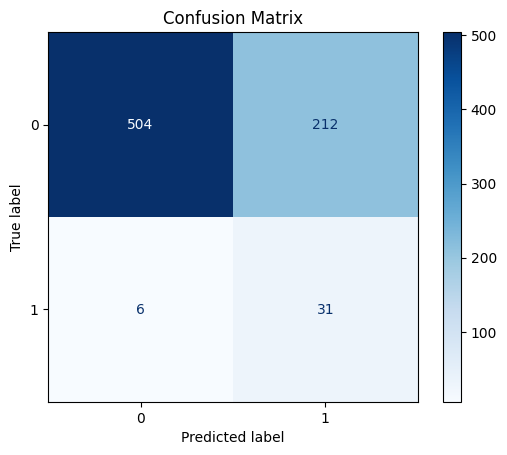

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

def plot_cm_classification_report(y_true, y_predicted, title = "Confusion Matrix"):
    cm = confusion_matrix(y_true, y_predicted)

    # print(cm)
    print(classification_report(y_true, y_predicted, digits=4))

    # Create display with labels from the unique classes
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=sorted(y_true.unique()))


    disp.plot(cmap="Blues", values_format='d')
    plt.title(title)
    plt.show()

# cm = confusion_matrix(y_test, y_pred)

# # print(cm)
# print(classification_report(y_test, y_pred, digits=4))

# # Create display with labels from the unique classes
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                               display_labels=sorted(y_test.unique()))


# disp.plot(cmap="Blues", values_format='d')
# plt.title("Confusion Matrix")
# plt.show()

plot_cm_classification_report(y_test, y_pred)


In [71]:
def plot_base_model_confusion(
    base_model: str,
    y_true,
    base_predictions: dict,
    title_prefix="Confusion Matrix"
):
    y_pred = base_predictions[base_model]


    plot_cm_classification_report(y_true, y_pred, title=f"{title_prefix}: {base_model}")


    # cm = confusion_matrix(y_true, y_pred)

    # # print(cm)
    # print(classification_report(y_true, y_pred, digits=4))

    # disp = ConfusionMatrixDisplay(
    #     confusion_matrix=cm,
    #     display_labels=sorted(y_true.unique())
    # )

    # disp.plot(cmap="Blues", values_format="d")
    # plt.title(f"{title_prefix}: {base_model}")
    # plt.show()

In [ ]:
model_y_pred = stacked_model.base_model_predict(x_test)

widgets.interact(
    plot_base_model_confusion,
    base_model=widgets.Dropdown(options=sorted(model_y_pred.keys())),
    y_true=widgets.fixed(y_test),
    base_predictions=widgets.fixed(model_y_pred),
    title_prefix = widgets.fixed("Base model Confusion matrix")
);


interactive(children=(Dropdown(description='base_model', options=('logreg_base', 'nb', 'nn', 'qda', 'rfc', 'sv…

In [ ]:
from copy import deepcopy
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from IPython.display import clear_output


new_stacked_model: StackingEnsemble

def iterated_feature_reduction(best_score):
    X_current = X_train.copy()
    y_current = y_train.copy()
    x_curr_test = x_test.copy()
    y_curr_test = y_test.copy()

    max_drops = 40
    dropped_features = []
    no_improve_rounds = 0

    best_iteration = 0
    best_base_models = None


    # best_score = 0.0
    # best_score = f1_score(y_test, y_pred)
    n_dropped = 0

    while n_dropped < max_drops:
        print(f"current iteration: {n_dropped + 1}, current best score: {best_score}")
        # fresh base models every iteration
        new_base_models = deepcopy(base_models)

        new_base_models["nn"] = Pipeline([
            ("scaler", StandardScaler()),
            ("nn", create_nn_classifier(
                input_dim=X_current.shape[1],
                numb_classifiers=2,
                random_state=random_state
            ))
        ])

        new_stacked_model = StackingEnsemble(
            new_base_models,
            meta_model=meta_tree,
            n_folds=5
        )

        # FIT FIRST
        new_stacked_model.fit(X_current, y_current, save = False)

        # THEN PREDICT
        y_pred = new_stacked_model.predict(x_curr_test)
        score = f1_score(y_curr_test, y_pred)

        if score > best_score:
            print(f"Performance improved to {score:.4f}")
            best_score = score
            best_iteration = len(dropped_features)
            best_base_models = deepcopy(new_base_models)

            no_improve_rounds = 0
        else:
            no_improve_rounds += 1

        if no_improve_rounds >= 10:
            print("No improvement in 10 rounds, stopping.")
            break


        if n_dropped % 3 == 0:
            clear_output(wait=True)

        # importances = rf.feature_importances_
        indices = new_stacked_model.lest_order_feature_importances

        least_important_feature = X_current.columns[indices[0]]
        dropped_features.append((least_important_feature, score))

        X_current = X_current.drop(columns=[least_important_feature])
        x_curr_test = x_curr_test.drop(columns=[least_important_feature])

        n_dropped += 1
        print(f"Dropped: {least_important_feature}")

    clear_output(wait=True)
    print("Final dropped features:", dropped_features)

    remove_features = exclude_cols.copy()
    remove_features += [f for f, _ in dropped_features[:best_iteration]]

    
    print("Best score is: ", best_score)
    return remove_features, best_base_models




try:
    new_stacked_model: StackingEnsemble = StackingEnsemble.load_or_create(name="reduced_features_model")
except FileNotFoundError:
    remove_features, new_base_models = iterated_feature_reduction(best_score= f1_score(y_test, y_pred))

    if new_base_models == None:
        print("Did not get better score by reduction!")
        new_stacked_model = stacked_model
    else:
        new_stacked_model = StackingEnsemble(
            base_models = new_base_models,
            meta_model=meta_tree,
            excluded_cols=remove_features,
            n_folds=5,
            name ="reduced_features_model")



remove_features = new_stacked_model.get_excluded_cols

reduced_x_train = X_train.drop(columns=remove_features, errors="ignore")
reduced_x_test = x_test.drop(columns=remove_features, errors="ignore")

reduced_y_train = y_train.copy()
reduced_y_test = y_test.copy()

if not new_stacked_model.check_trained:
    new_stacked_model.fit(reduced_x_train, reduced_y_train)



Loading model from meta_data\reduced_features_model


              precision    recall  f1-score   support

           0     1.0000    0.9008    0.9478       716
           1     0.3426    1.0000    0.5103        37

    accuracy                         0.9057       753
   macro avg     0.6713    0.9504    0.7291       753
weighted avg     0.9677    0.9057    0.9263       753



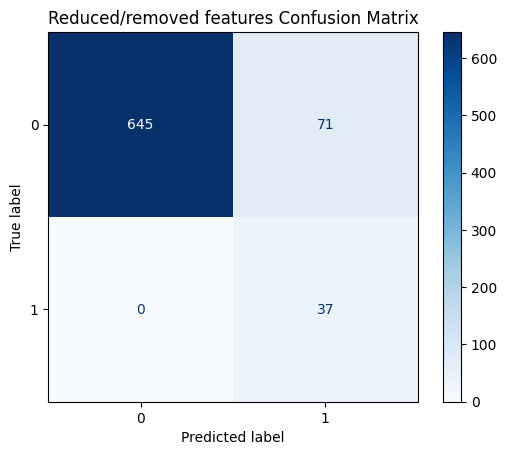

              precision    recall  f1-score   support

           0     1.0000    0.9008    0.9478       716
           1     0.3426    1.0000    0.5103        37

    accuracy                         0.9057       753
   macro avg     0.6713    0.9504    0.7291       753
weighted avg     0.9677    0.9057    0.9263       753



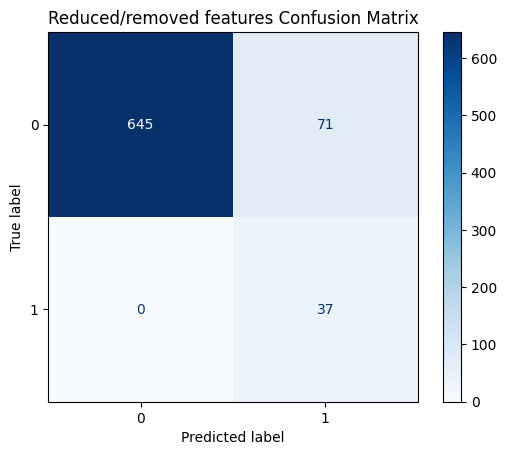

In [ ]:
# y_pred.sum()

# Stackingmodel2: StackingEnsemble = StackingEnsemble.load_or_create()

y_pred_reduced = new_stacked_model.predict(reduced_x_test)


plot_cm_classification_report(reduced_y_test, y_pred_reduced, title="Reduced/removed features Confusion Matrix")

# # from sklearn.metrics import confusion_matrix

# cm = confusion_matrix(reduced_y_test, y_pred_reduced)
# # test.unique()

# # print(cm)
# print(classification_report(reduced_y_test, y_pred_reduced, digits=4))

# # Create display with labels from the unique classes
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                               display_labels=sorted(reduced_y_test.unique()))


# disp.plot(cmap="Blues", values_format='d')
# plt.title("Reduced/removed features Confusion Matrix")
# plt.show()


In [54]:
model_y_pred_reduced = new_stacked_model.base_model_predict(x_test)

widgets.interact(
    plot_base_model_confusion,
    base_model=widgets.Dropdown(options=sorted(model_y_pred_reduced.keys())),
    y_true=widgets.fixed(reduced_y_test),
    base_predictions=widgets.fixed(model_y_pred_reduced),
    title_prefix = widgets.fixed("Reduced/Removed features, base model Confusion Matrix")
);


interactive(children=(Dropdown(description='base_model', options=('logreg_base', 'nb', 'nn', 'qda', 'rfc', 'sv…

In [55]:
from sklearn.metrics import f1_score, make_scorer, accuracy_score

f1 = f1_score(y_test, y_pred)
f1_reduced = f1_score(reduced_y_test, y_pred_reduced)

print(f"Original model {f1:.4f} VS reduced noisy and unimportant features {f1_reduced:.4f}")

# final_model: StackingEnsemble = stacked_model if f1 > f1_reduced else new_stacked_model


final_model: StackingEnsemble = stacked_model if f1 > f1_reduced else new_stacked_model
x_test_final = x_test if f1 > f1_reduced else reduced_x_test

final_model.set_name = "Final_model"
final_model.save_model()


Original model 0.2214 VS reduced noisy and unimportant features 0.3006
Model saved to meta_data\Final_model


<!-- <center>
<h3>
This poor performance is probabbly due to:
</h3>
</center>

<p>
    This poor performance of the stacked model is likely due to overlapping transient features. Meaning it is hard for the base models to classify TDE:s vs non and other transients. For example a (supernova?) a supernova can have similar feature values as an TDE, but will likly be wrongly classified as `1` (TDE). This claim is also suported by how the PCA and t-SNE projections give information about the data.
</p>

<p>
    Therefore a further study and solution to this problem, would be to introduce more classifications of other `transients`. Thus likely increase the models performance on TDE:s vs Non TDE:s and other transients.
</p> -->






<center>
    <h3>
        <!-- Why the F1 score is relatively low -->
        This relatively low F1 performance is likely due to strong feature overlap between TDEs and other types of astronomical transients.
    </h3>
</center>

<p>
  Our stacked model achieves an F1 score of roughly <strong>0.17–0.29</strong> for identifying tidal disruption events (TDEs).
  A likely reason is <strong>limited class separability</strong>: the engineered light-curve feature vectors for TDEs overlap
  substantially with those of non-TDE transients. In photometric feature space, several other transient types (e.g., some
  supernova-like events) can exhibit similar rise/decay behavior and variability statistics, which increases confusion and
  leads to <strong>many false positives</strong>.
</p>

<p>
  This interpretation is supported by the <strong>PCA</strong> and <strong>t-SNE</strong> projections, which show heavy overlap
  between the TDE and non-TDE samples rather than cleanly separated clusters. This suggests that the performance limitation
  is primarily driven by <strong>overlapping feature distributions</strong> (i.e., the data representation), not merely by the
  choice of classifier or meta-model.
</p>

<p>
  A plausible direction for future work is to use a <strong>more fine-grained labeling strategy</strong>, such as a
  <strong>multi-class</strong> or <strong>hierarchical</strong> approach that explicitly separates major transient families
  (e.g., supernova subtypes vs. nuclear transients) before making a final TDE decision. The goal would be to reduce
  systematic confusion between TDEs and specific non-TDE populations, which could improve the precision–recall trade-off and
  therefore the TDE F1 score. Note that adding more classes does not automatically guarantee improved performance; it helps
  only if the additional labels reflect genuinely distinct and learnable structure in the data.
</p>


ROC AUC: 0.8368


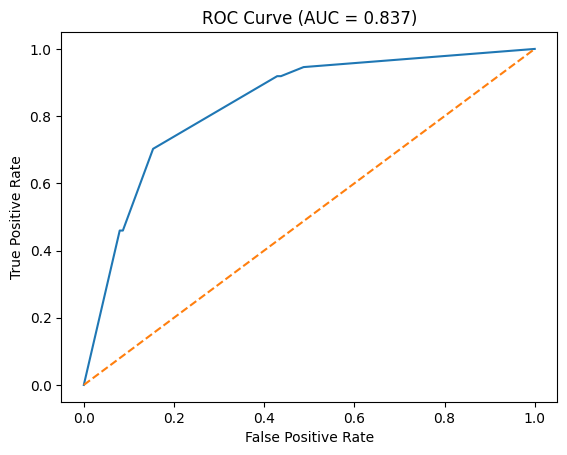

In [56]:
from sklearn.metrics import roc_auc_score


y_prob = final_model.predict_proba(x_test_final)[:, 1]

# “If I randomly pick one positive and one negative, how often does the model rank the positive higher?”
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {roc_auc:.4f}")


from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {roc_auc:.3f})")
plt.show()


In [57]:
# from sklearn.metrics import precision_recall_curve, average_precision_score

# precision, recall, thresholds = precision_recall_curve(y_test, p_val)
# ap = average_precision_score(y_test, p_val)

# print("PR AUC (AP):", ap)


In [58]:
pred_dist = (
    pd.Series(y_pred)
    .value_counts()
    .sort_index()
    .rename("Count_pred")
)


true_dist = (
    y
    .value_counts()
    .sort_index()
    .rename("Count_true")
)

print("Class distribution in y_pred:")
print(pred_dist, "\n")

print("Class distribution in y:")
print(true_dist)


Class distribution in y_pred:
0    510
1    243
Name: Count_pred, dtype: int64 

Class distribution in y:
target
0    2863
1     147
Name: Count_true, dtype: int64


In [59]:
x_full = X.copy().drop(columns=final_model.get_excluded_cols, errors="ignore")
y_full = y

final_model.fit(x_full, y_full, save= False)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Final model trained: nn
Final model trained: nb
Final model trained: xgb
Final model trained: svm_sigmoid
Final model trained: svm_poly
Final model trained: qda
Final model trained: logreg_base
Final model trained: rfc


In [60]:
final_model.set_name = "test"
final_model.save_model()

Model saved to meta_data\test


In [61]:
from classify import create_submissionfile
submission_df = create_submissionfile(model_name = "test")

Loading model from meta_data\test
Safe rows: 7050, NaN rows: 85
Meta-model failed, using null safe models as fallback (Input contains NaN.)
Meta-model failed, using null safe models as fallback (Input contains NaN.)
Meta-model failed, using null safe models as fallback (Input contains NaN.)
Submission saved to: c:\Users\rasmu\OneDrive - BTH Student\Documents\PythonProjects\year3\Machine_Learning\Final_project\submission_files\submission_5.csv


tests:

In [62]:
friedman_stat , friedman_p = final_model.friedman
print(friedman_stat,friedman_p)

30.0 9.495972508134177e-05


In [63]:
print(final_model.posthoc_nemenyi)

                   nn        nb       xgb  svm_sigmoid  svm_poly       qda  \
nn           1.000000  0.059740  1.000000     0.001616  0.216050  0.969547   
nb           0.059740  1.000000  0.040902     0.969547  0.999584  0.525520   
xgb          1.000000  0.040902  1.000000     0.000943  0.162371  0.942583   
svm_sigmoid  0.001616  0.969547  0.000943     1.000000  0.780488  0.059740   
svm_poly     0.216050  0.999584  0.162371     0.780488  1.000000  0.848284   
qda          0.969547  0.525520  0.942583     0.059740  0.848284  1.000000   
logreg_base  0.216050  0.999584  0.162371     0.780488  1.000000  0.848284   
rfc          0.942583  0.615019  0.902525     0.085327  0.902525  1.000000   

             logreg_base       rfc  
nn              0.216050  0.942583  
nb              0.999584  0.615019  
xgb             0.162371  0.902525  
svm_sigmoid     0.780488  0.085327  
svm_poly        1.000000  0.902525  
qda             0.848284  1.000000  
logreg_base     1.000000  0.902525  
r

The Friedman and Nemenyi tests show that the base models are not statistically equivalent in performance, indicating heterogeneity that provides potential for effective stacking.

The Friedman test indicates statistically significant differences in performance among the base models, and the Nemenyi post-hoc analysis identifies specific model pairs with differing ranks. Together, these results suggest that the model set exhibits sufficient heterogeneity in performance to justify the use of a stacking ensemble

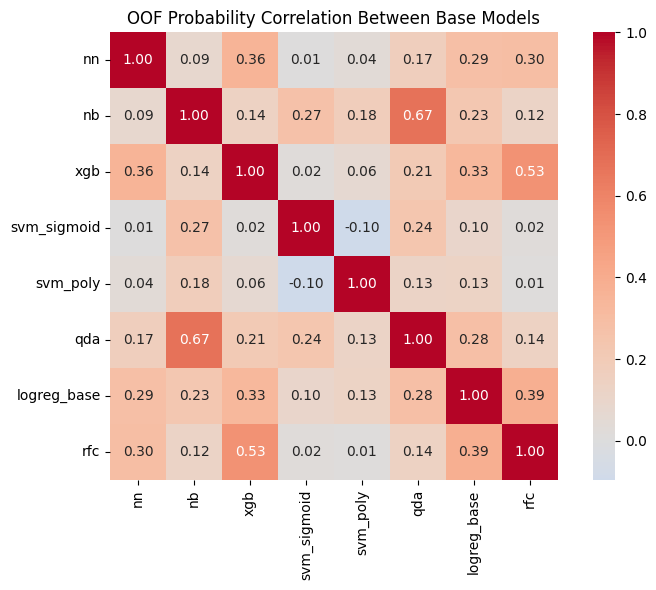

In [64]:
corr_df = final_model.evaluate_base_models()


plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_df,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True
)
plt.title("OOF Probability Correlation Between Base Models")
plt.tight_layout()
plt.show()

“Statistical tests (Friedman and Nemenyi) indicate heterogeneity among base models.
Further analysis of out-of-fold prediction correlations shows low to moderate dependence between models, indicating complementary error patterns.
Together with the observed improvement in ROC-AUC, this supports the effectiveness of the stacking ensemble.”

In [65]:
from classify import create_submissionfile

create_submission = True


if create_submission:
    submission_df = create_submissionfile(model_name = "Final_model")
else:
    submission_folder = os.path.join(os.getcwd(), "submission_files", "submission_0.csv")
    submission_df = pd.read_csv(submission_folder, sep = ",")


Loading model from meta_data\Final_model
Safe rows: 7050, NaN rows: 85
Meta-model failed, using null safe models as fallback (Input contains NaN.)
Meta-model failed, using null safe models as fallback (Input contains NaN.)
Meta-model failed, using null safe models as fallback (Input contains NaN.)
Submission saved to: c:\Users\rasmu\OneDrive - BTH Student\Documents\PythonProjects\year3\Machine_Learning\Final_project\submission_files\submission_6.csv


In [66]:
submission_df.describe()

,prediction
count,7135.000000
mean,0.183602
std,0.387186
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


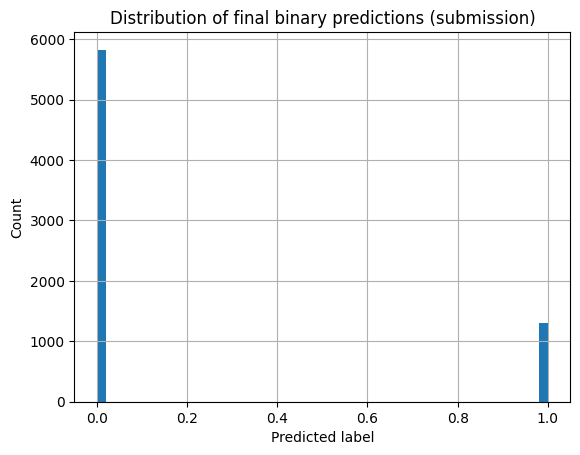

prediction
0    0.816398
1    0.183602
Name: proportion, dtype: float64

In [67]:
import matplotlib.pyplot as plt

submission_df["prediction"].hist(bins=50)
plt.xlabel("Predicted label")
plt.ylabel("Count")
plt.title("Distribution of final binary predictions (submission)")
plt.show()

submission_df["prediction"].value_counts(normalize=True)

